**Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Step 1: Reading and Understanding the Data

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [ ]:
# to display all coulmns of a dataframe
pd.set_option('display.max_column', None)

# to display all rows of a dataframe
pd.set_option('display.max_rows', None)

# to display all items of a long sequence
pd.set_option('display.max_seq_items', None)

# to display complete contents inside a cell in dataframe
pd.set_option('display.max_colwidth', None)

pd.set_option('expand_frame_repr', True)

In [ ]:
# Importing the dataset
df_bike = pd.read_csv('/content/drive/MyDrive/Upgrad Case Study Loan Dataset/linear regression/day.csv')

In [ ]:
# Checking the insights about data

df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
df_bike.shape

(730, 16)

In [ ]:
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# checking for the null values

df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# some of the columsn are named in short form so renaming for ease of understanding

df_bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [ ]:
df_bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
df_bike_copy = df_bike.copy()

In [ ]:
# checking the shape of new dataframe

df_bike_copy.shape

(730, 16)

In [ ]:
# dropping the duplicates
df_bike_copy.drop_duplicates(inplace=True)

In [ ]:
df_bike_copy.shape

(730, 16)

***The shape before and after execution of dropping duplicates is same which shows there are no duplicate data available***

In [ ]:
# Dropping unwanted columns: 'instant' is just a row index, 'dteday' can be represented by 'year' and 'month', and 'casual' and 'registered' are subcategories of 'cnt'

df_bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [ ]:
# mapping the season

df_bike.season = df_bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [ ]:
# mapping the month

df_bike.month = df_bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [ ]:
# mapping the weekday

df_bike.weekday = df_bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [ ]:
# mapping the weathersit

df_bike.weathersit = df_bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_rain',4:'Heavy_rain'})

In [ ]:
df_bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Visualising the Data

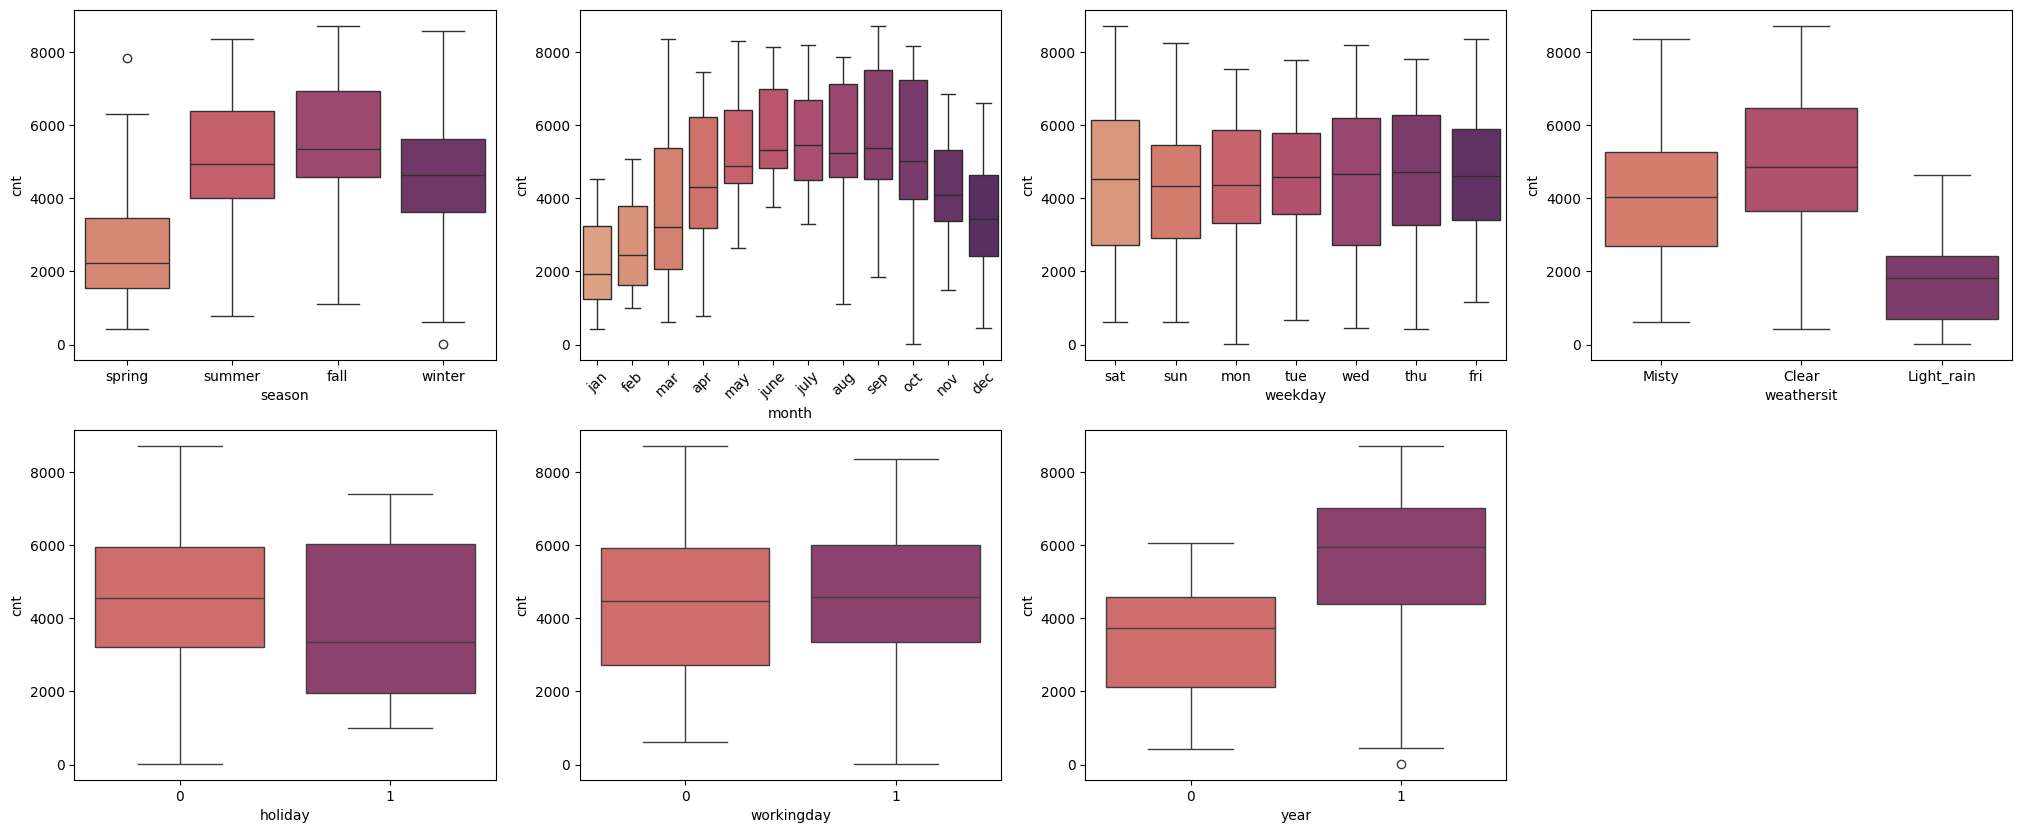

In [ ]:
# Analyzing and visualizing the categorical columns to understand how predictor variables relate to the target variable

plt.figure(figsize=(25, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike, palette='flare')
plt.subplot(2,4,2)
ax = sns.boxplot(x = 'month', y = 'cnt', data = df_bike, palette='flare')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike, palette='flare')
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike, palette='flare')
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike, palette='flare')
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike, palette='flare')
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df_bike, palette='flare')
plt.show()

In [ ]:
# Function to generate bar plots for categorical columns

def plotting_category_cols(column, row):
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.barplot(x = column, y = row, data=df_bike, palette='ch:s=.25,rot=-.25')
    plt.subplot(1,2,2)
    sns.barplot(x = column, y = row, data=df_bike, hue='year',palette='flare')
    plt.legend(labels=['2018', '2019'])
    plt.show()

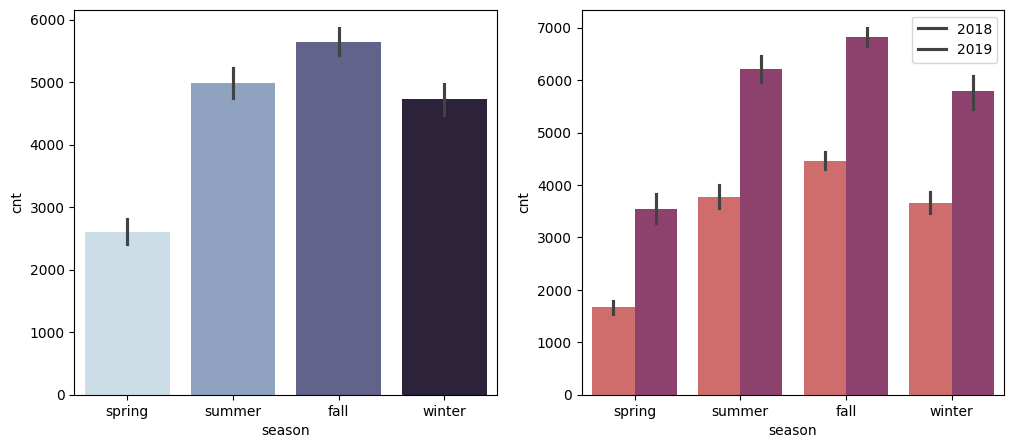

In [ ]:
# season
plotting_category_cols('season', 'cnt')

***The fall season appears to have attracted more bookings, with a significant increase in booking counts for each season from 2018 to 2019.***

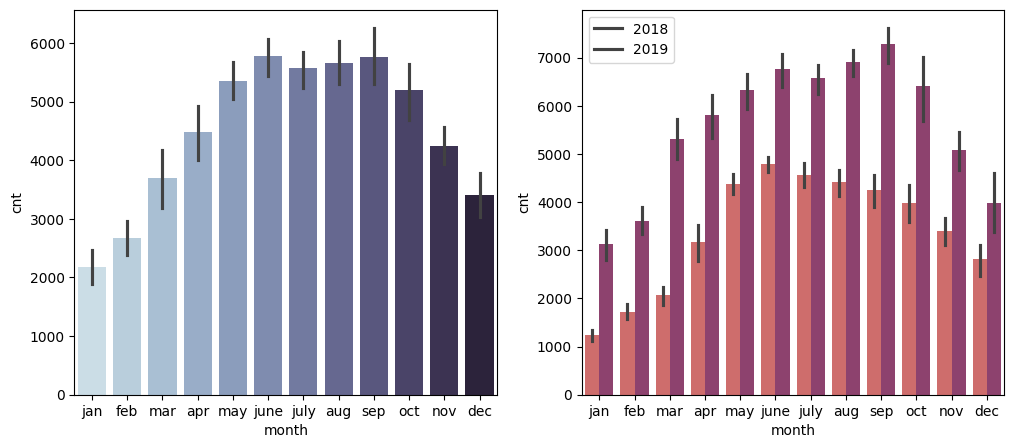

In [ ]:
#month
plotting_category_cols('month', 'cnt')

***The majority of bookings occur from May to October, with an increasing trend from the beginning of the year until mid-year, followed by a decline towards the year's end. Additionally, the number of bookings for each month has increased from 2018 to 2019.***

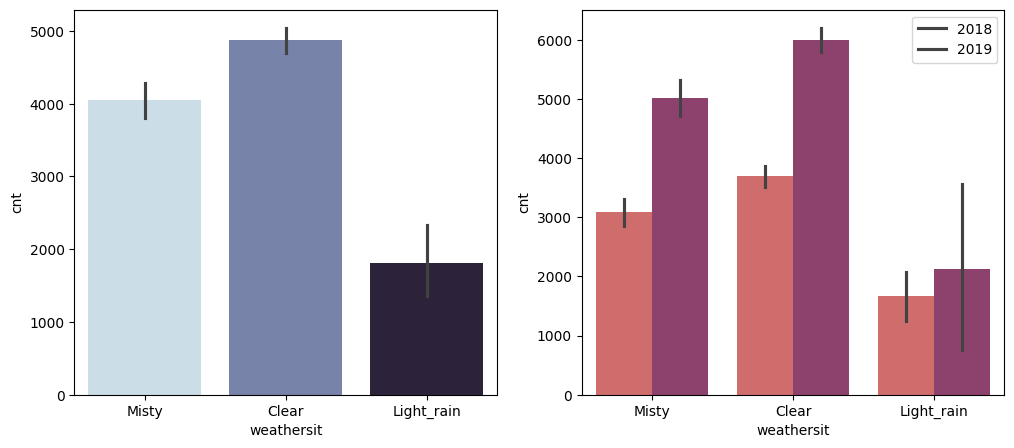

In [ ]:
#weathersit
plotting_category_cols('weathersit', 'cnt')

***Clear weather clearly attracted more bookings, which is quite evident. Additionally, compared to 2018, bookings increased for all types of weather conditions in 2019.***

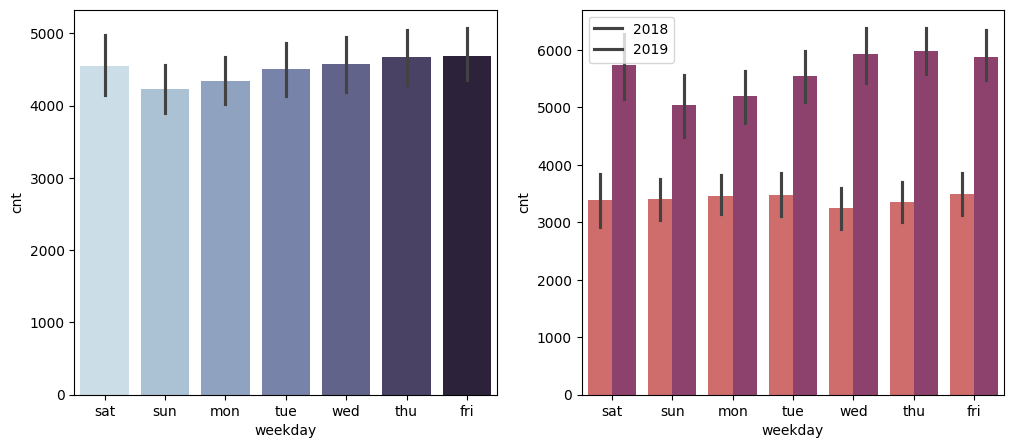

In [ ]:
#weekday
plotting_category_cols('weekday', 'cnt')

***Thursday, Friday, Saturday, and Sunday show higher booking numbers compared to the beginning of the week.***

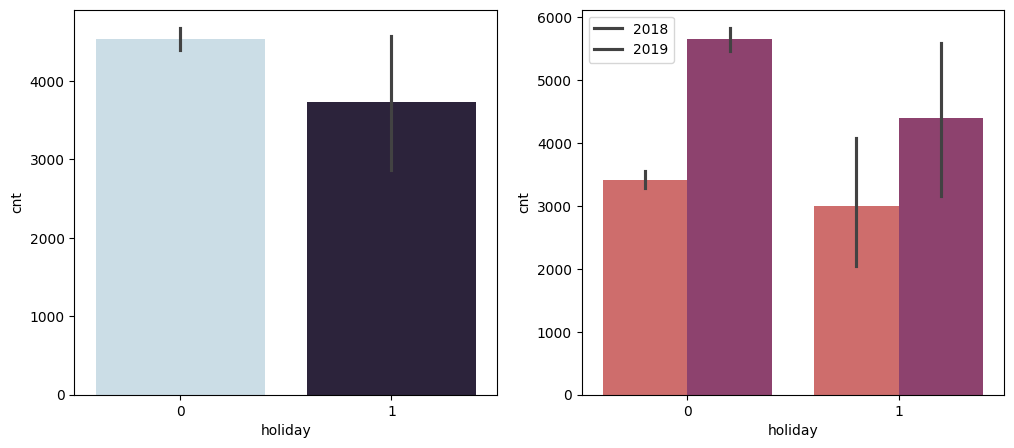

In [ ]:
#holiday
plotting_category_cols('holiday', 'cnt')

***During non-holiday periods, bookings appear to be lower, which is reasonable since people may prefer to spend time at home and enjoy with their families during holidays.***

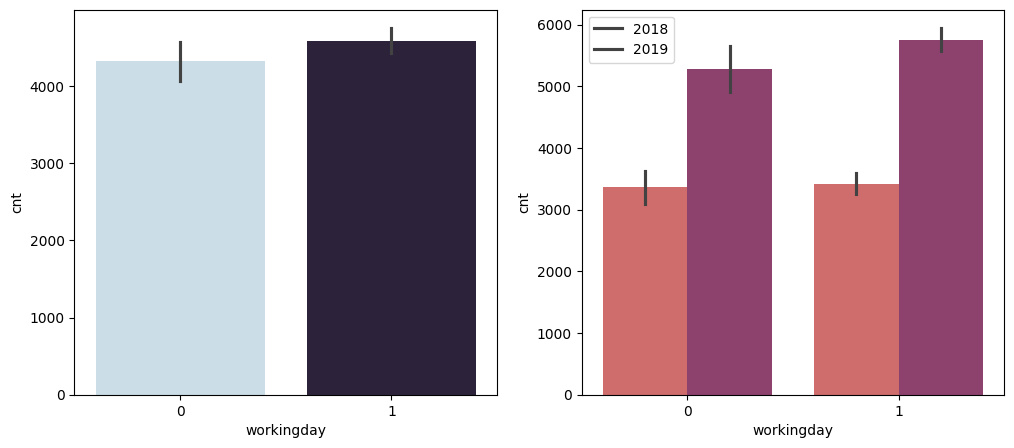

In [ ]:
#workingday
plotting_category_cols('workingday', 'cnt')

***Booking counts appeared to be nearly equal on both working days and non-working days. However, the overall count increased from 2018 to 2019.***

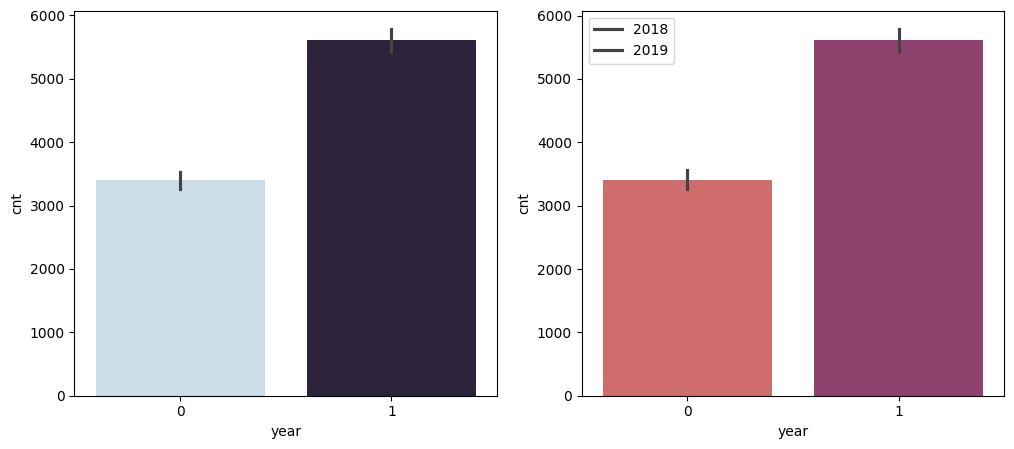

In [ ]:
#year
plotting_category_cols('year', 'cnt')

***Attracting more bookings compared to the previous year demonstrates good progress in terms of business growth.***

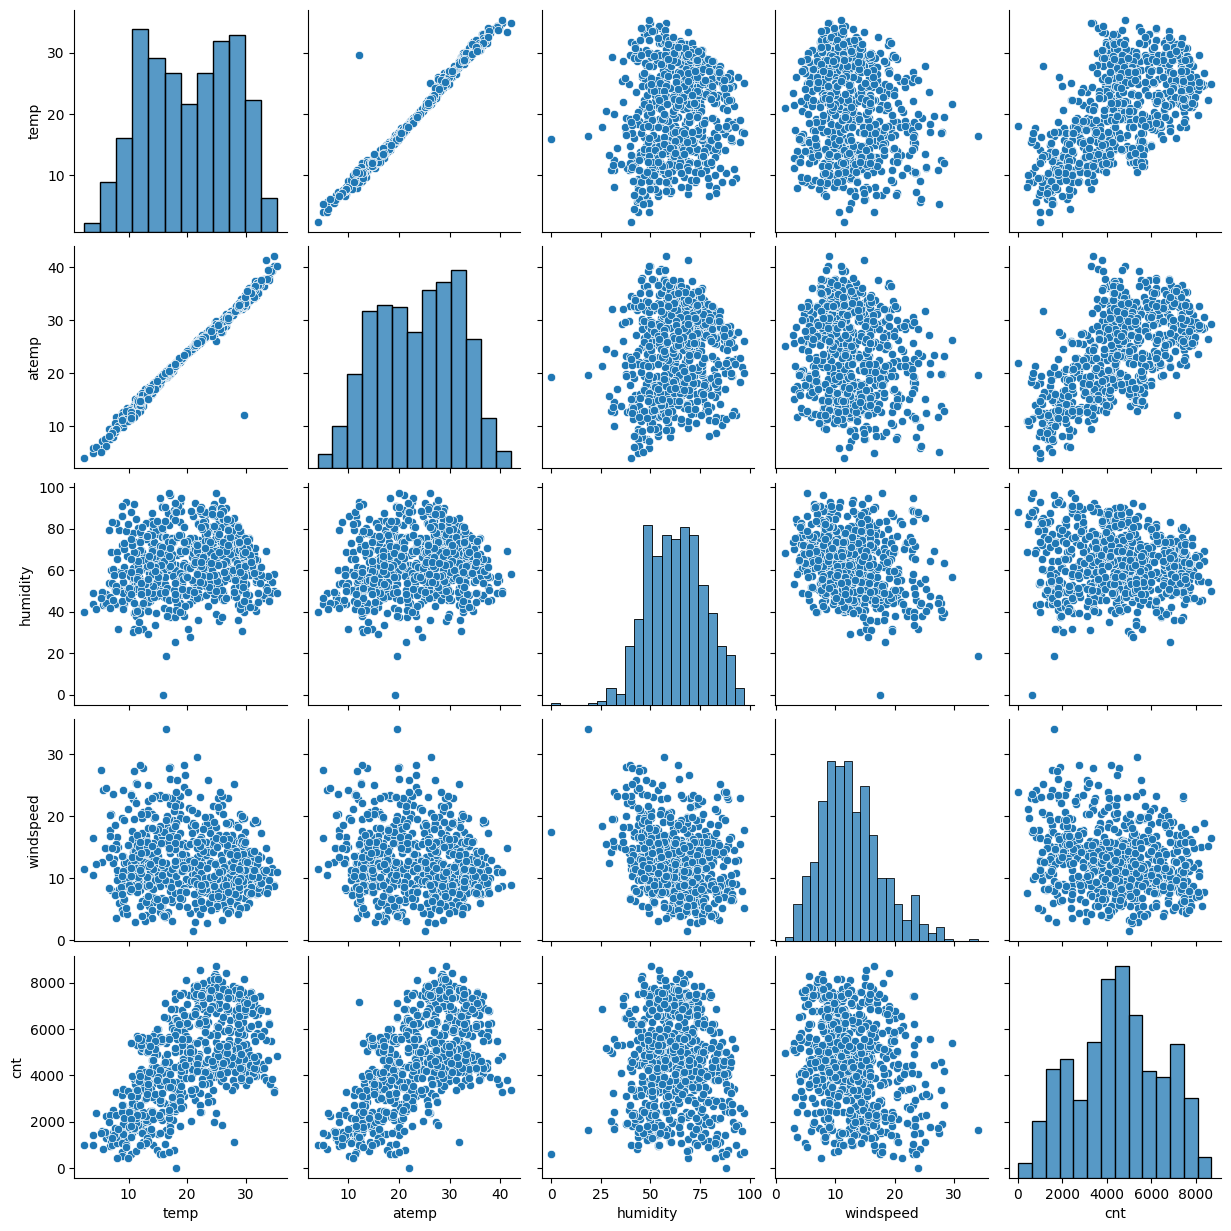

In [ ]:
# Analyzing and visualizing the numerical data columns.
sns.pairplot(data=df_bike,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

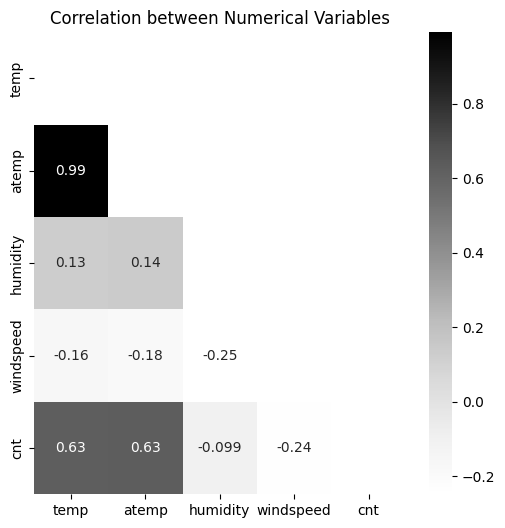

In [ ]:
# Checking for correlation between the numerical variables

plt.figure(figsize = (6,6))
mat = np.triu(df_bike[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df_bike[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="Greys", mask=mat)
plt.title("Correlation between Numerical Variables")
plt.show()

***There is a linear relationship between temp and atemp, but due to multicollinearity, only one of these parameters will be included in the model based on VIF and p-values relative to other variables.***

## Step 3: Data Preparation

In [ ]:
# Creating dummy variables for month, weekday, weathersit, and season variables.

months_df_bike=pd.get_dummies(df_bike.month,drop_first=True, dtype='int')
weekdays_df_bike=pd.get_dummies(df_bike.weekday,drop_first=True, dtype='int')
weathersit_df_bike=pd.get_dummies(df_bike.weathersit,drop_first=True, dtype='int')
seasons_df_bike=pd.get_dummies(df_bike.season,drop_first=True, dtype='int')

In [ ]:
df_bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
# Merging the dataframe with the dataset containing dummy variables.

df_bike_new = pd.concat([df_bike,months_df_bike,weekdays_df_bike,weathersit_df_bike,seasons_df_bike],axis=1)

In [ ]:
df_bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_rain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
df_bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aug         730 non-null    int64  
 13  dec         730 non-null    int64  
 14  feb         730 non-null    int64  
 15  jan         730 non-null    int64  
 16  july        730 non-null    int64  
 17  june        730 non-null    int64  
 18  mar         730 non-null    int64  
 19  may         730 non-null    i

In [ ]:
# After creating dummy variables, unnecessary columns are being dropped from the dataset for simplification.

df_bike_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [ ]:
df_bike_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_rain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
df_bike_new.shape

(730, 30)

In [ ]:
df_bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   aug         730 non-null    int64  
 9   dec         730 non-null    int64  
 10  feb         730 non-null    int64  
 11  jan         730 non-null    int64  
 12  july        730 non-null    int64  
 13  june        730 non-null    int64  
 14  mar         730 non-null    int64  
 15  may         730 non-null    int64  
 16  nov         730 non-null    int64  
 17  oct         730 non-null    int64  
 18  sep         730 non-null    int64  
 19  mon         730 non-null    i

## Step 4: Splitting the Data into Training and Testing Sets

In [ ]:
# splitting into train and test set

np.random.seed(15)
df_bike_train, df_bike_test = train_test_split(df_bike_new, train_size = 0.7, random_state = 100)

In [ ]:
#train set
df_bike_train.shape

(510, 30)

In [ ]:
#test set
df_bike_test.shape

(220, 30)

In [ ]:
#MinMaxScaler to Rescaling
scale_mm = MinMaxScaler()

In [ ]:
df_bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_rain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

numericals_cols = ['temp','atemp','humidity','windspeed','cnt']
df_bike_train[numericals_cols] = scale_mm.fit_transform(df_bike_train[numericals_cols])

In [ ]:
df_bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_rain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
df_bike_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_rain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


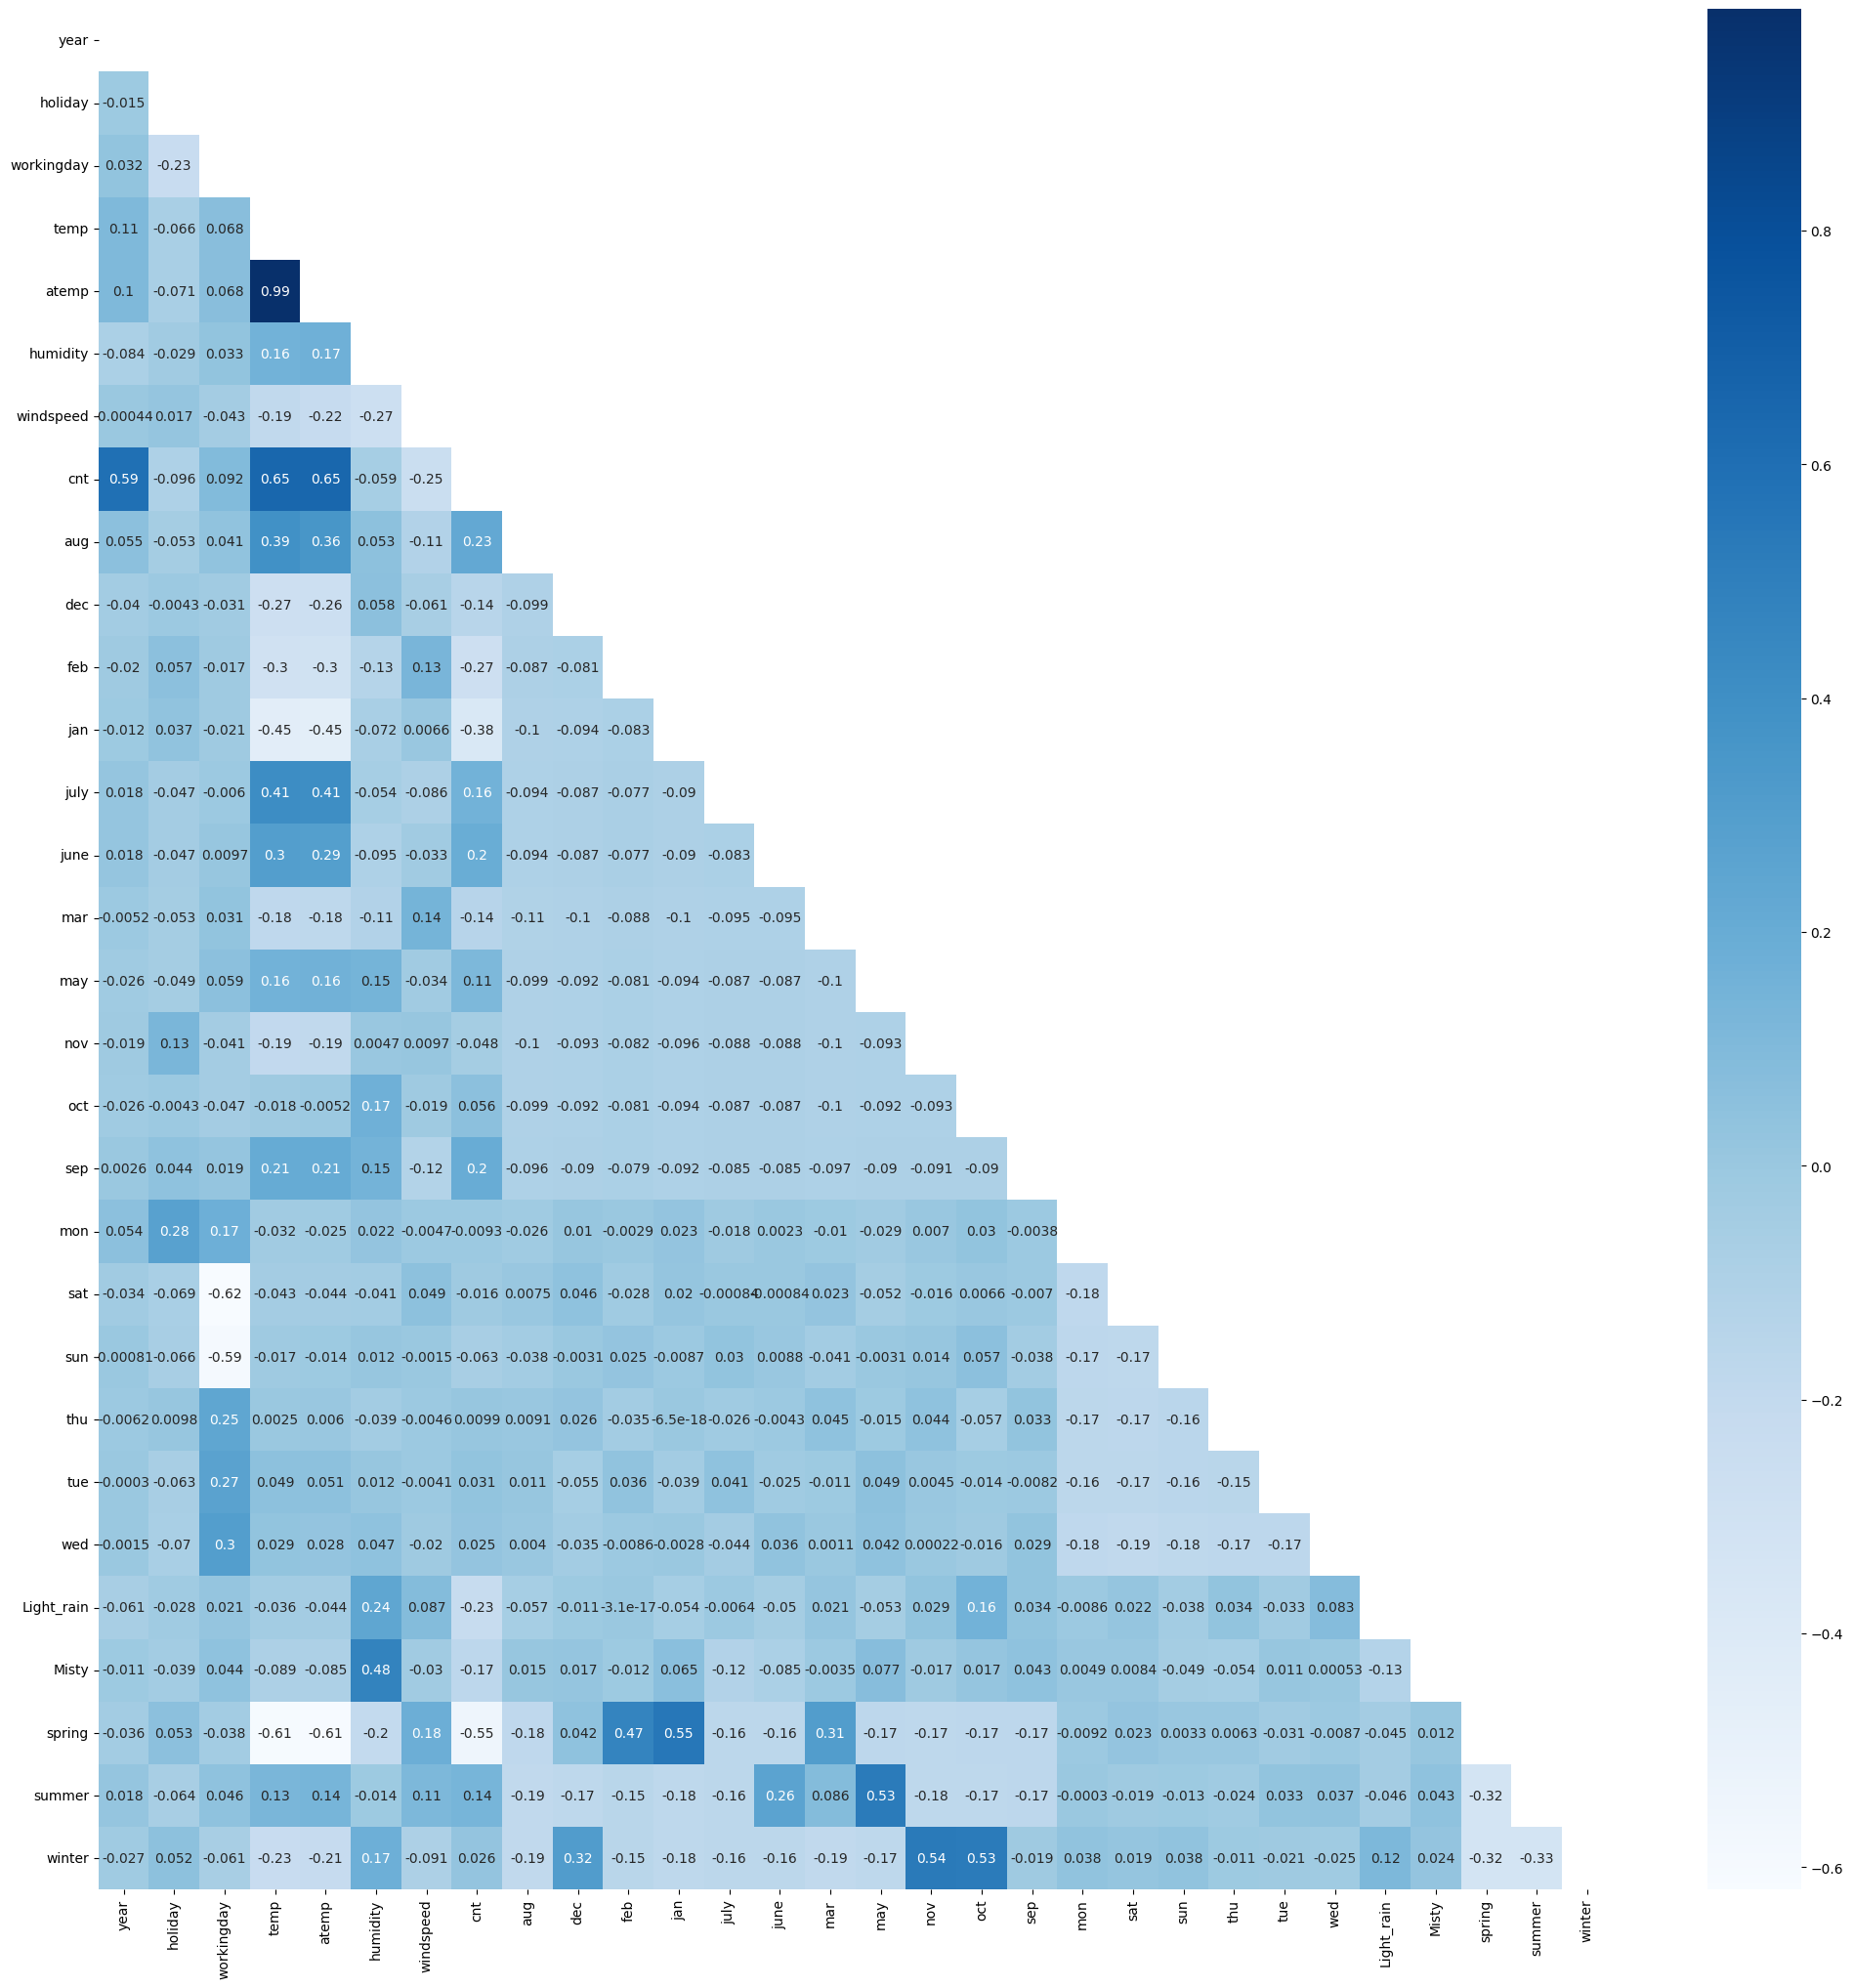

In [ ]:
# Check the correlation coefficients to identify highly correlated variables.
plt.figure(figsize = (25,25))
mat = np.triu(df_bike_train.corr())
sns.heatmap(df_bike_train.corr(), annot = True, cmap="Blues", mask=mat)
plt.show()

***The variable "cnt" shows correlations with the "year" variable and "temp". Additionally, "Misty" weather conditions and humidity exhibit correlation. There is also notable correlation between the Spring season with January and February months, the Summer season with May month, and the Winter season with October and November months.***

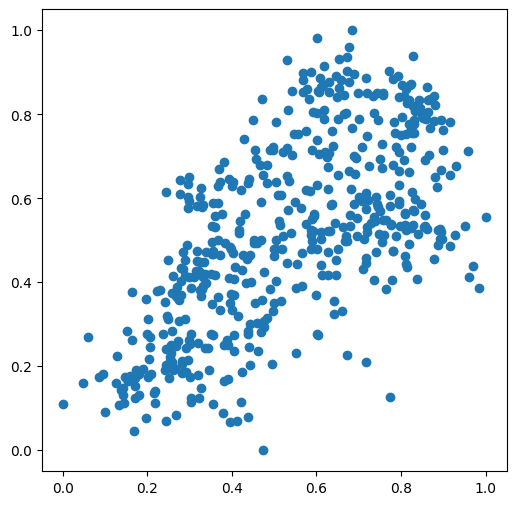

In [ ]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_bike_train.temp, df_bike_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

In [ ]:
# Building the Linear Model

y_bike_train = df_bike_train.pop('cnt')
X_bike_train = df_bike_train

In [ ]:
# Recursive feature elimination

lr = LinearRegression()
lr.fit(X_bike_train, y_bike_train)

rfe = RFE(lr, step = 15)
rfe = rfe.fit(X_bike_train, y_bike_train)

In [ ]:
#List of variables selected in top 15 list

list(zip(X_bike_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 2),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', False, 2),
 ('june', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', False, 2),
 ('sat', False, 2),
 ('sun', False, 2),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('Light_rain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [ ]:
# selecting the selected variable via RFE in col list

col = X_bike_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'dec',
       'jan', 'sep', 'Light_rain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')


In [ ]:
# checking which columns has been rejected
X_bike_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [ ]:
# Generic function to calculate VIF of variables

def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [ ]:
# dataframe with RFE selected variables

X_bike_train_rfe = X_bike_train[col]

In [ ]:
X_bike_train_rfe.head()

,year,holiday,temp,atemp,humidity,windspeed,dec,jan,sep,Light_rain,Misty,spring,summer,winter
576,1,0,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0,0,0,0,1,1,0,0
728,1,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,1,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0,0,0,0,1,0,1,0
111,0,0,0.345824,0.318819,0.751824,0.380981,0,0,0,0,1,0,1,0


In [ ]:
# calculate VIF
calculate_vif(X_bike_train_rfe)

,Features,VIF
2,temp,376.20
3,atemp,366.79
4,humidity,30.37
5,windspeed,4.89
11,spring,4.32
13,winter,3.41
12,summer,2.59
10,Misty,2.31
0,year,2.09
7,jan,1.73


## Step 5: Building a linear model

In [ ]:
# Building 1st linear regression model

X_bike_train_lr_1 = sm.add_constant(X_bike_train_rfe)
lr_1 = sm.OLS(y_bike_train, X_bike_train_lr_1.astype(float)).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          4.12e-187
Time:                        15:36:06   Log-Likelihood:                 507.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     495   BIC:                            -921.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2923      0.035      8.238      0.0

In [ ]:
# Since working day exhibits high VIF values, it is advisable to drop this variable from the analysis.
X_bike_train_new = X_bike_train_rfe.drop(['temp'], axis = 1)

#calculate VIF for the new model
calculate_vif(X_bike_train_new)

,Features,VIF
3,humidity,29.75
2,atemp,15.56
4,windspeed,4.51
10,spring,4.04
12,winter,3.09
11,summer,2.40
9,Misty,2.30
0,year,2.08
6,jan,1.73
5,dec,1.34


VIF values seems to be good now. But we will see if we can reduce further ?

In [ ]:
# Building 2nd linear regression model

X_bike_train_lr_2 = sm.add_constant(X_bike_train_rfe)
lr_2 = sm.OLS(y_bike_train, X_bike_train_lr_2.astype(float)).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          4.12e-187
Time:                        15:36:32   Log-Likelihood:                 507.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     495   BIC:                            -921.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2923      0.035      8.238      0.0

VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [ ]:
# We can drop humidity variable as it has high p-value
X_bike_train_new = X_bike_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_vif(X_bike_train_new)

,Features,VIF
3,windspeed,4.50
2,atemp,3.83
9,spring,2.74
0,year,2.07
10,summer,1.92
11,winter,1.89
5,jan,1.64
8,Misty,1.56
4,dec,1.29
6,sep,1.23


In [ ]:
# Building 3th linear regression model

X_bike_train_lr_3 = sm.add_constant(X_bike_train_new)
lr_3 = sm.OLS(y_bike_train, X_bike_train_lr_3.astype(float)).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.3
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.37e-183
Time:                        15:36:47   Log-Likelihood:                 492.91
No. Observations:                 510   AIC:                            -959.8
Df Residuals:                     497   BIC:                            -904.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2468      0.031      8.013      0.0

In [ ]:
# We can drop sat variable as it has high p-value
X_bike_train_new = X_bike_train_new.drop(['dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_vif(X_bike_train_new)

,Features,VIF
3,windspeed,4.50
2,atemp,3.83
8,spring,2.62
0,year,2.07
9,summer,1.92
10,winter,1.64
4,jan,1.60
7,Misty,1.56
5,sep,1.23
6,Light_rain,1.08


In [ ]:
# Building 4th linear regression model

X_bike_train_lr_4 = sm.add_constant(X_bike_train_new)
lr_4 = sm.OLS(y_bike_train,X_bike_train_lr_4.astype(float)).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          1.11e-183
Time:                        15:37:01   Log-Likelihood:                 490.89
No. Observations:                 510   AIC:                            -957.8
Df Residuals:                     498   BIC:                            -907.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2326      0.030      7.740      0.0

In [ ]:
# We can drop jan variable as it has high p-value
X_bike_train_new = X_bike_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_vif(X_bike_train_new)

,Features,VIF
3,windspeed,4.48
2,atemp,3.81
0,year,2.06
7,spring,1.98
8,summer,1.92
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_rain,1.08
1,holiday,1.04


In [ ]:
# Building 5th linear regression model

X_bike_train_lr_5 = sm.add_constant(X_bike_train_new)
lr_5 = sm.OLS(y_bike_train,X_bike_train_lr_5.astype(float)).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.6
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          1.07e-183
Time:                        15:37:09   Log-Likelihood:                 488.08
No. Observations:                 510   AIC:                            -954.2
Df Residuals:                     499   BIC:                            -907.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2151      0.029      7.355      0.0

***We can consider the above model (lr_5) since it shows low multicollinearity among predictors and significant p-values for all predictors.***

***The F-statistics value of 272 (greater than 1) and the p-value of 1.11e-202(almost zero) indicate that the overall model is highly significant.***

In [ ]:
# Checking the parameters and their coefficient values
lr_5.params

const         0.215052
year          0.235522
holiday      -0.092978
atemp         0.471361
windspeed    -0.131119
sep           0.087275
Light_rain   -0.281073
Misty        -0.079250
spring       -0.079256
summer        0.046002
winter        0.072475
dtype: float64

## Step 6: Residual Analysis of the train data and validation

In [ ]:
X_bike_train_lr_5.head()

,const,year,holiday,atemp,windspeed,sep,Light_rain,Misty,spring,summer,winter
576,1.0,1,0,0.766351,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.200348,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.391735,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.318819,0.380981,0,0,1,0,1,0


In [ ]:
y_bike_train_pred = lr_5.predict(X_bike_train_lr_5)

#### Normality of error terms

Text(0.5, 0, 'Errors')

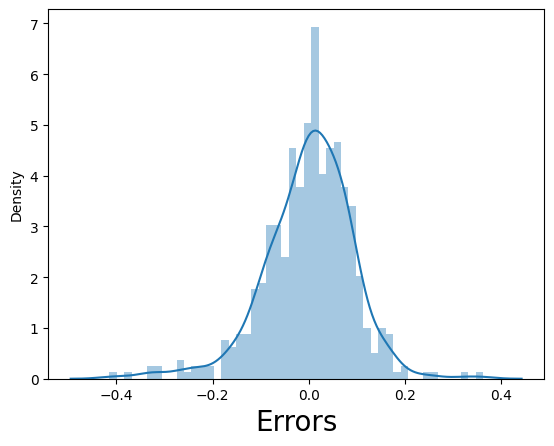

In [ ]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_bike_train - y_bike_train_pred), bins = 50)
plt.xlabel('Errors', fontsize = 20)

***Error terms are following normal distribution***

#### Multi Colinearity

In [ ]:
calculate_vif(X_bike_train_new)

,Features,VIF
3,windspeed,4.48
2,atemp,3.81
0,year,2.06
7,spring,1.98
8,summer,1.92
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_rain,1.08
1,holiday,1.04


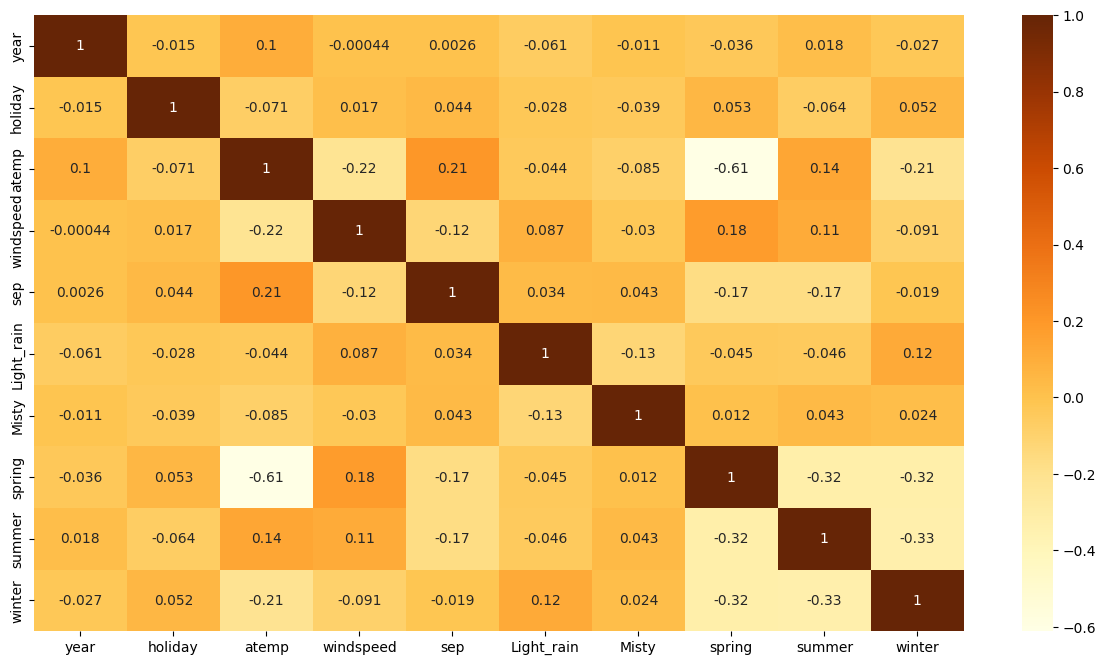

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(X_bike_train_new.corr(),annot = True, cmap="YlOrBr")
plt.show()

***VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.***

#### Linearity

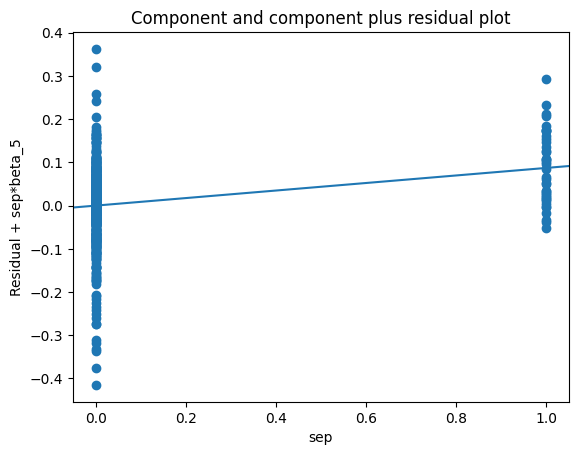

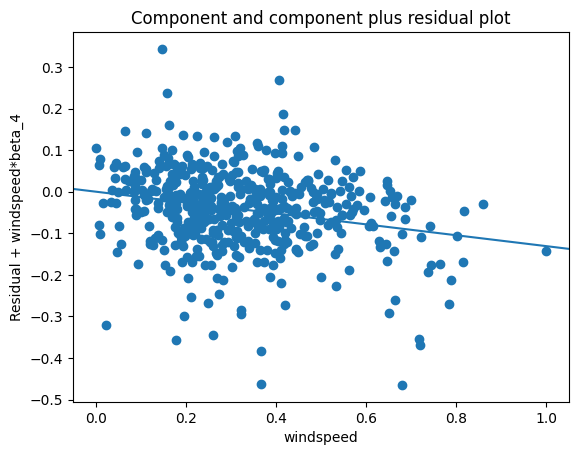

In [ ]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

# sm.graphics.plot_ccpr(lr_5, 'temp')
# plt.show()

sm.graphics.plot_ccpr(lr_5, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

***Linearity can be observed from above visualizations.***

#### Homoscedasticity

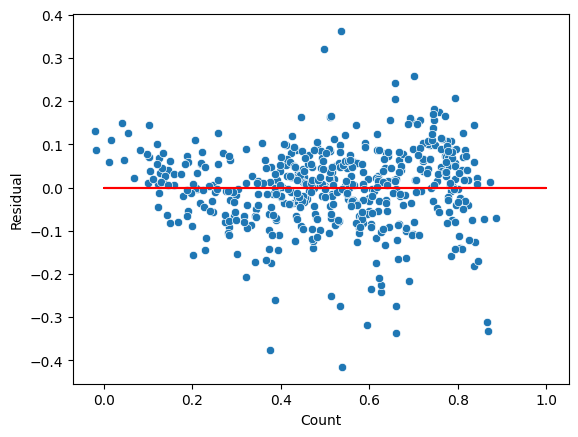

In [ ]:
y_bike_train_pred = lr_5.predict(X_bike_train_lr_5)
res = y_bike_train - y_bike_train_pred
sns.scatterplot(x=y_bike_train_pred, y=res)
plt.plot(y_bike_train,(y_bike_train - y_bike_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

***Independence of residuals***

Durbin-Watson value of final model lr_5 is 2.079, which signifies there is no autocorrelation.

***No visible pattern observed from above plot for residuals.***

## Step 7: Making Predictions Using the Final Model

Having completed model fitting and verified the normality of error terms, we are now prepared to proceed with predictions using the final model (5th model).

In [ ]:
# Applying scaling on the test dataset

numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_bike_test[numerical_cols] = scale_mm.transform(df_bike_test[numerical_cols])
df_bike_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_rain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_bike_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_rain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_bike_test = df_bike_test.pop('cnt')
X_bike_test = df_bike_test

In [ ]:
col_1 = X_bike_train_new.columns

X_bike_test = X_bike_test[col_1]

# Adding constant variable to test dataframe
X_bike_test_lr_5 = sm.add_constant(X_bike_test)

In [ ]:
y_bike_pred = lr_5.predict(X_bike_test_lr_5)

In [ ]:
r2 = r2_score(y_bike_test, y_bike_pred)
round(r2,4)

0.8071

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_bike_pred')

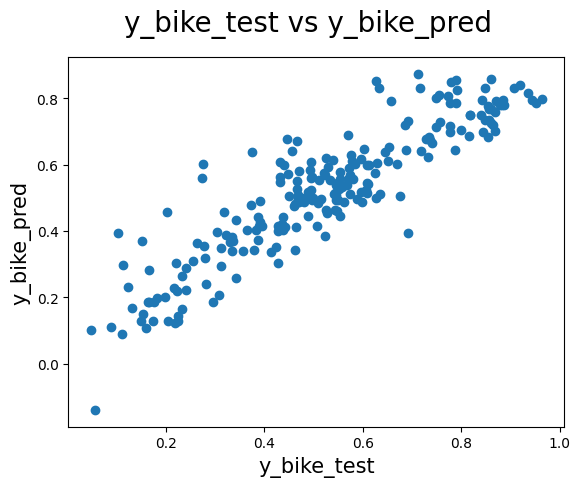

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_bike_test, y_bike_pred)
fig.suptitle('y_bike_test vs y_bike_pred', fontsize = 20)
plt.xlabel('y_bike_test', fontsize = 15)
plt.ylabel('y_bike_pred', fontsize = 15)

In [ ]:
round(lr_5.params,4)

const         0.2151
year          0.2355
holiday      -0.0930
atemp         0.4714
windspeed    -0.1311
sep           0.0873
Light_rain   -0.2811
Misty        -0.0793
spring       -0.0793
summer        0.0460
winter        0.0725
dtype: float64

In [ ]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_bike_test.shape[0]-1)/(X_bike_test.shape[0]-X_bike_test.shape[1]-1),4)
print(adjusted_r2)

0.7978


In [ ]:
# # Convert to numeric types, if necessary
# y_bike_test = np.asarray(y_bike_test, dtype=float)
# y_bike_pred = np.asarray(y_bike_pred, dtype=float)

# # Ensure there are no NaN or infinite values
# y_bike_test = y_test[np.isfinite(y_test) & np.isfinite(y_pred)]
# y_bike_pred = y_pred[np.isfinite(y_test) & np.isfinite(y_pred)]

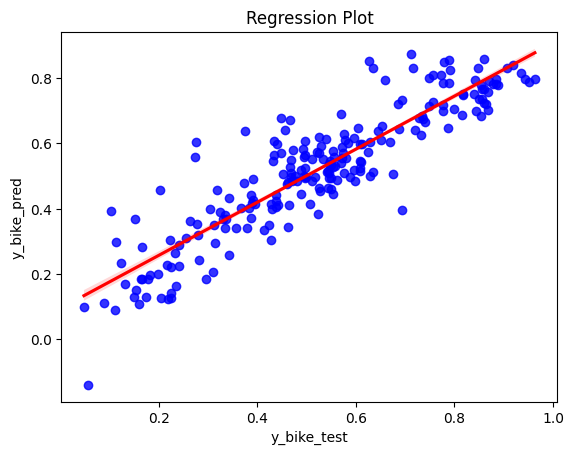

In [ ]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_bike_test, y=y_bike_pred, ci=68, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('y_bike_test')
plt.ylabel('y_bike_pred')
plt.title('Regression Plot')
plt.show()
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.828
    - Test dataset R^2           : 0.8071
    - Train dataset Adjusted R^2 : 0.825    
    - Test dataset Adjusted R^2  : 0.7978

### ***The demand for bikes is contingent upon variables including year, holiday status, adjusted temperature (atemp), windspeed, September, Light_rain, Misty weather conditions, and the seasons of spring, summer, and winter.***